<a href="https://colab.research.google.com/github/joooser/TENSORFLOW2/blob/main/Tumor_classiffier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
import os
import zipfile

In [53]:
!wget --no-check-certificate https://storage.googleapis.com/platzi-tf2/TumorClassification.zip \
    -O /tmp/platzi-tf2/TumorClassification.zip

--2022-06-09 02:59:24--  https://storage.googleapis.com/platzi-tf2/TumorClassification.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.193.128, 172.217.204.128, 172.217.203.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.193.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7460028 (7.1M) [application/zip]
Saving to: ‘/tmp/platzi-tf2/TumorClassification.zip’

/tmp/platzi-tf2/Tum 100%[===================>]   7.11M  --.-KB/s    in 0.05s   

2022-06-09 02:59:24 (137 MB/s) - ‘/tmp/platzi-tf2/TumorClassification.zip’ saved [7460028/7460028]



In [54]:
local_zip = "/tmp/platzi-tf2/TumorClassification.zip"
zip_ref = zipfile.ZipFile(local_zip, "r")
zip_ref.extractall("/tmp/platzi-tf2")
zip_ref.close()

In [55]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import string
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import requests as requests
from PIL import Image
from io import BytesIO
import codecs
import json


In [56]:
train_dir = "/tmp/platzi-tf2/Train"
test_dir = "/tmp/platzi-tf2/Test"

In [57]:
train_datagen = ImageDataGenerator(rescale = 1/255)
test_datagen = ImageDataGenerator(rescale = 1/255, validation_split= 0.2)

In [58]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (28, 28),
    batch_size = 128,
    class_mode = "categorical",
    color_mode = "grayscale",
    subset = "training"
)

validation_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (28, 28),
    batch_size = 128,
    class_mode = "categorical",
    color_mode = "grayscale",
    subset = "validation"
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (28, 28),
    batch_size = 128,
    class_mode = "categorical",
    color_mode = "grayscale"
)

Found 1050 images belonging to 3 classes.
Found 28 images belonging to 3 classes.
Found 144 images belonging to 3 classes.


In [59]:
classes = ["BENIGN", "MALIGNANT", "NORMAL"]

In [60]:
classes

['BENIGN', 'MALIGNANT', 'NORMAL']

In [61]:
def plotImages(images_arr):
  fig, axes = plt.subplots(1, 5, figsize = (10, 10))
  axes = axes.flatten()
  for img, ax in zip(images_arr, axes):
    ax.imshow(img[:,:,0])
    ax.axis("off")
  plt.tight_layout()
  plt.show()

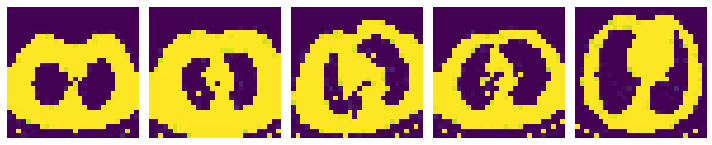

In [62]:
sample_training_images, _= next(train_generator)
plotImages(sample_training_images[:5])

In [63]:
model_base = tf.keras.models.Sequential([
              tf.keras.layers.Flatten(input_shape= (28, 28, 1)),
              tf.keras.layers.Dense(256, activation = "relu"),
              tf.keras.layers.Dense(128, activation = "relu"),
              tf.keras.layers.Dense(len(classes), activation = "softmax")
])

In [64]:
model_base.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_18 (Dense)            (None, 256)               200960    
                                                                 
 dense_19 (Dense)            (None, 128)               32896     
                                                                 
 dense_20 (Dense)            (None, 3)                 387       
                                                                 
Total params: 234,243
Trainable params: 234,243
Non-trainable params: 0
_________________________________________________________________


In [65]:
model_base.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ['accuracy'])


history = model_base.fit(
    train_generator, 
    epochs= 50, 
    validation_data = validation_generator
)

Epoch 1/50
9/9 [==============================] - 1s 92ms/step - loss: 1.0380 - accuracy: 0.4981 - val_loss: 1.2269 - val_accuracy: 0.3214
Epoch 2/50
9/9 [==============================] - 1s 71ms/step - loss: 0.7166 - accuracy: 0.7152 - val_loss: 1.2140 - val_accuracy: 0.4286
Epoch 3/50
9/9 [==============================] - 1s 69ms/step - loss: 0.4982 - accuracy: 0.8333 - val_loss: 1.4491 - val_accuracy: 0.4286
Epoch 4/50
9/9 [==============================] - 1s 73ms/step - loss: 0.3240 - accuracy: 0.9152 - val_loss: 1.6219 - val_accuracy: 0.6429
Epoch 5/50
9/9 [==============================] - 1s 68ms/step - loss: 0.2036 - accuracy: 0.9543 - val_loss: 2.1211 - val_accuracy: 0.6071
Epoch 6/50
9/9 [==============================] - 1s 71ms/step - loss: 0.1243 - accuracy: 0.9848 - val_loss: 2.3075 - val_accuracy: 0.6071
Epoch 7/50
9/9 [==============================] - 1s 75ms/step - loss: 0.0774 - accuracy: 0.9886 - val_loss: 2.8746 - val_accuracy: 0.6071
Epoch 8/50
9/9 [===========

In [66]:
results = model_base.evaluate(test_generator)

2/2 [==============================] - 0s 15ms/step - loss: 4.5794 - accuracy: 0.5833


In [67]:
def visualizacion_resultados(history):
  epochs = [i for i in range(50)]
  fig, ax = plt.subplots(1,2)
  train_acc = history.history["accuracy"]
  train_loss = history.history["loss"]
  val_acc = history.history["val_accuracy"]
  val_loss = history.history["val_loss"]
  fig.set_size_inches(16, 9)

  ax[0].plot(epochs, train_acc, "go-", label =" Entrenamiento accuracy")
  ax[0].plot(epochs, val_acc, "ro-", label= "Validacion accuracy")
  ax[0].set_title("Entrenamiento & validación accuracy")
  ax[0].legend()
  ax[0].set_xlabel("Epochs")
  ax[0].set_ylabel("Accuracy")

  ax[1].plot(epochs, train_loss, "go-", label =" Entrenamiento Loss")
  ax[1].plot(epochs, val_loss, "ro-", label= "Validacion Loss")
  ax[1].set_title("Entrenamiento & validación Loss")
  ax[1].legend()
  ax[1].set_xlabel("Epochs")
  ax[1].set_ylabel("Loss")

  plt.show()

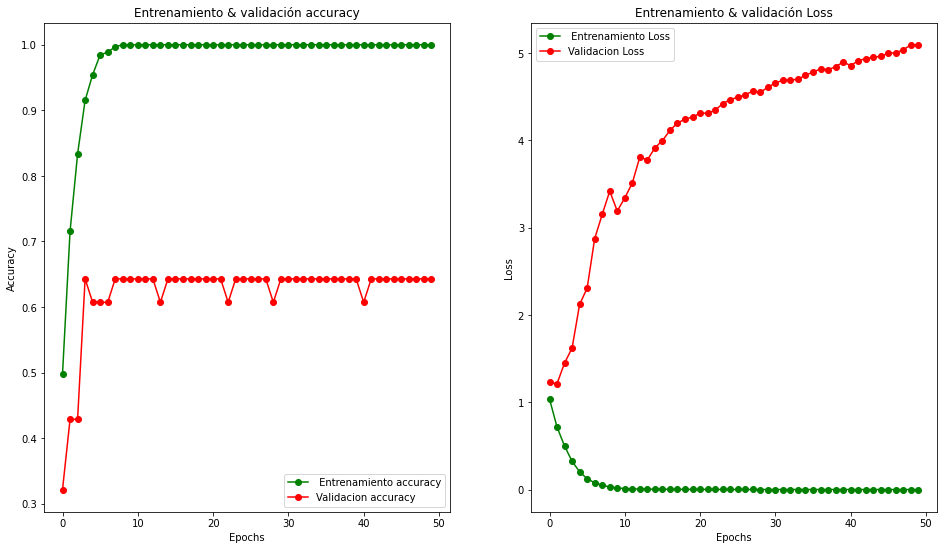

In [68]:
visualizacion_resultados(history)

In [69]:
from tensorflow.keras import regularizers

In [70]:
model_optimizer = tf.keras.models.Sequential([
              tf.keras.layers.Flatten(input_shape= (28, 28, 1)),
              tf.keras.layers.Dense(256, kernel_regularizer = regularizers.l2(1e-5), activation = "softmax"),
              tf.keras.layers.Dropout(0.2),
              tf.keras.layers.Dense(128, kernel_regularizer= regularizers.l2(1e-5),activation = "softmax"),
              tf.keras.layers.Dropout(0.2),
              tf.keras.layers.Dense(len(classes), activation = "sigmoid")
])

model_optimizer.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 784)               0         
                                                                 
 dense_21 (Dense)            (None, 256)               200960    
                                                                 
 dropout_8 (Dropout)         (None, 256)               0         
                                                                 
 dense_22 (Dense)            (None, 128)               32896     
                                                                 
 dropout_9 (Dropout)         (None, 128)               0         
                                                                 
 dense_23 (Dense)            (None, 3)                 387       
                                                                 
Total params: 234,243
Trainable params: 234,243
Non-tr

In [71]:
model_optimizer.compile(optimizer= "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

history_optimizer = model_optimizer.fit(
    train_generator,
    epochs = 50,
    validation_data = validation_generator
)

Epoch 1/50
9/9 [==============================] - 1s 94ms/step - loss: 1.1042 - accuracy: 0.3314 - val_loss: 1.1037 - val_accuracy: 0.2857
Epoch 2/50
9/9 [==============================] - 1s 70ms/step - loss: 1.1031 - accuracy: 0.3371 - val_loss: 1.1030 - val_accuracy: 0.2857
Epoch 3/50
9/9 [==============================] - 1s 70ms/step - loss: 1.1025 - accuracy: 0.3267 - val_loss: 1.1022 - val_accuracy: 0.2857
Epoch 4/50
9/9 [==============================] - 1s 71ms/step - loss: 1.1013 - accuracy: 0.3333 - val_loss: 1.1012 - val_accuracy: 0.2857
Epoch 5/50
9/9 [==============================] - 1s 69ms/step - loss: 1.1003 - accuracy: 0.3457 - val_loss: 1.1003 - val_accuracy: 0.2857
Epoch 6/50
9/9 [==============================] - 1s 70ms/step - loss: 1.0991 - accuracy: 0.3743 - val_loss: 1.0992 - val_accuracy: 0.2857
Epoch 7/50
9/9 [==============================] - 1s 75ms/step - loss: 1.0979 - accuracy: 0.4324 - val_loss: 1.0987 - val_accuracy: 0.2857
Epoch 8/50
9/9 [===========

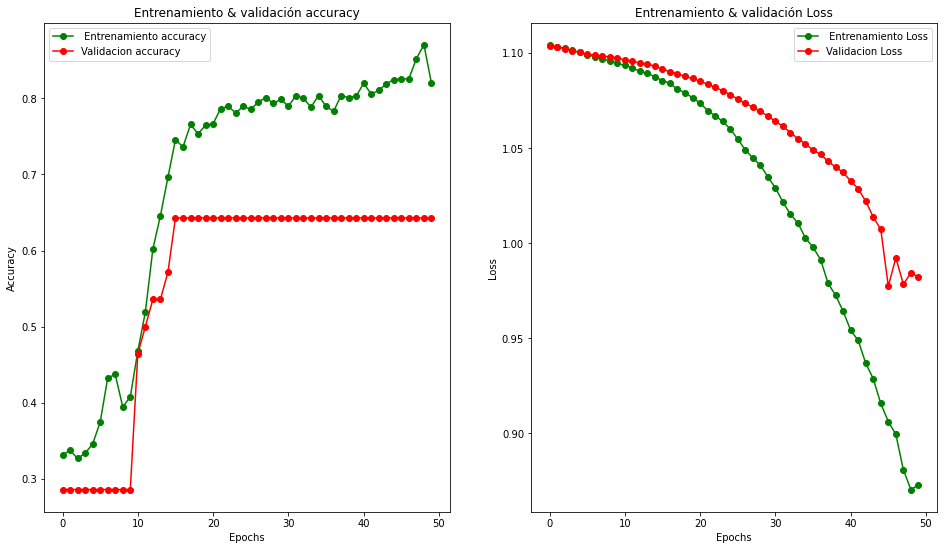

In [72]:
def visualizacion_resultados(history):
  epochs = [i for i in range(50)]
  fig, ax = plt.subplots(1,2)
  train_acc = history.history["accuracy"]
  train_loss = history.history["loss"]
  val_acc = history.history["val_accuracy"]
  val_loss = history.history["val_loss"]
  fig.set_size_inches(16, 9)

  ax[0].plot(epochs, train_acc, "go-", label =" Entrenamiento accuracy")
  ax[0].plot(epochs, val_acc, "ro-", label= "Validacion accuracy")
  ax[0].set_title("Entrenamiento & validación accuracy")
  ax[0].legend()
  ax[0].set_xlabel("Epochs")
  ax[0].set_ylabel("Accuracy")

  ax[1].plot(epochs, train_loss, "go-", label =" Entrenamiento Loss")
  ax[1].plot(epochs, val_loss, "ro-", label= "Validacion Loss")
  ax[1].set_title("Entrenamiento & validación Loss")
  ax[1].legend()
  ax[1].set_xlabel("Epochs")
  ax[1].set_ylabel("Loss")

  plt.show()

visualizacion_resultados(history_optimizer)

convoluciones


In [86]:
model_convolutional = tf.keras.models.Sequential([
              tf.keras.layers.Conv2D(75, (3,3), activation = "relu", input_shape= (28, 28, 1)),
              tf.keras.layers.MaxPool2D((2,2)),
              tf.keras.layers.Flatten(),
              tf.keras.layers.Dense(256, kernel_regularizer = regularizers.l2(1e-5), activation = "relu"),
              tf.keras.layers.Dropout(0.2),
              tf.keras.layers.Dense(128, kernel_regularizer= regularizers.l2(1e-5),activation = "relu"),
              tf.keras.layers.Dropout(0.2),
              tf.keras.layers.Dense(len(classes), activation = "softmax")
])

model_convolutional.summary()

model_convolutional.compile(optimizer= "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

history_convolutional = model_convolutional.fit(
    train_generator,
    epochs = 50,
    validation_data = validation_generator
)

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 26, 26, 75)        750       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 13, 13, 75)       0         
 2D)                                                             
                                                                 
 flatten_11 (Flatten)        (None, 12675)             0         
                                                                 
 dense_33 (Dense)            (None, 256)               3245056   
                                                                 
 dropout_16 (Dropout)        (None, 256)               0         
                                                                 
 dense_34 (Dense)            (None, 128)               32896     
                                                     

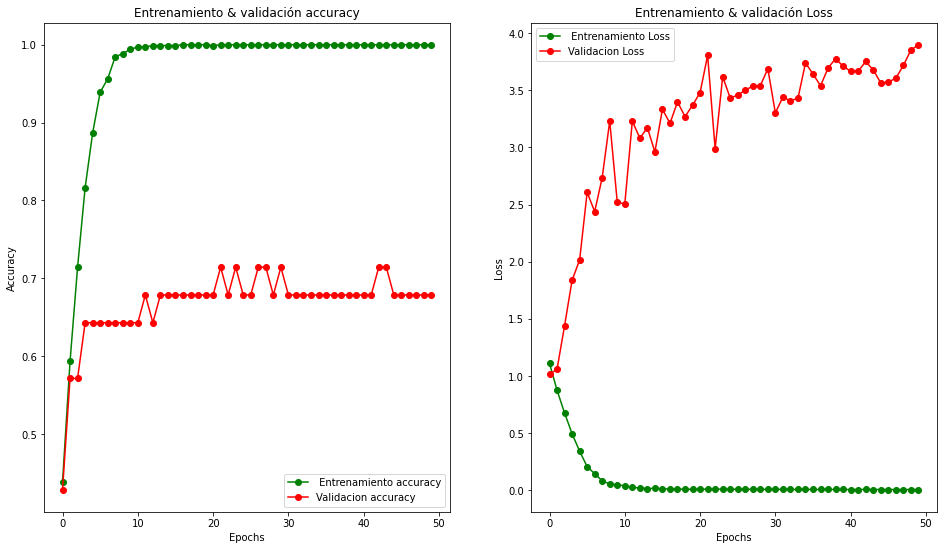

In [74]:
visualizacion_resultados(history_convolutional)

CALLBACKS

In [75]:
model_callback = tf.keras.models.Sequential([
              tf.keras.layers.Conv2D(75, (3,3), activation = "relu", input_shape= (28, 28, 1)),
              tf.keras.layers.MaxPool2D((2,2)),
              tf.keras.layers.Flatten(),
              tf.keras.layers.Dense(256, kernel_regularizer = regularizers.l2(1e-5), activation = "relu"),
              tf.keras.layers.Dropout(0.2),
              tf.keras.layers.Dense(128, kernel_regularizer= regularizers.l2(1e-5),activation = "relu"),
              tf.keras.layers.Dropout(0.2),
              tf.keras.layers.Dense(len(classes), activation = "softmax")
])

model_callback.summary()

model_callback.compile(optimizer= "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 75)        750       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 13, 13, 75)       0         
 2D)                                                             
                                                                 
 flatten_9 (Flatten)         (None, 12675)             0         
                                                                 
 dense_27 (Dense)            (None, 256)               3245056   
                                                                 
 dropout_12 (Dropout)        (None, 256)               0         
                                                                 
 dense_28 (Dense)            (None, 128)               32896     
                                                      

In [79]:
from tensorflow.keras.callbacks import Callback

class TrainingCallback(Callback):
  def on_epoch_end(self, epoch, logs = {}):
    if logs.get("accuracy") > 0.999:
      print("Lo logramos, nuestro modelo llego a 95%, detenemos el entrenamiento")
      self.model.stop_training = True

In [84]:
callback = TrainingCallback()

history_callback = model_callback.fit(
    train_generator,
    epochs = 50,
    callbacks = [callback],
    validation_data = validation_generator
)

Epoch 1/50
9/9 [==============================] - 2s 215ms/step - loss: 0.0162 - accuracy: 0.9990 - val_loss: 2.4953 - val_accuracy: 0.6429


In [87]:
def get_model():
  model = tf.keras.models.Sequential([
              tf.keras.layers.Conv2D(75, (3,3), activation = "relu", input_shape= (28, 28, 1)),
              tf.keras.layers.MaxPool2D((2,2)),
              tf.keras.layers.Flatten(),
              tf.keras.layers.Dense(256, kernel_regularizer = regularizers.l2(1e-5), activation = "relu"),
              tf.keras.layers.Dropout(0.2),
              tf.keras.layers.Dense(128, kernel_regularizer= regularizers.l2(1e-5),activation = "relu"),
              tf.keras.layers.Dropout(0.2),
              tf.keras.layers.Dense(len(classes), activation = "softmax")
  ])
  return model

model_early = get_model()
model_early.summary()

model_early.compile(optimizer= "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 75)        750       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 13, 13, 75)       0         
 2D)                                                             
                                                                 
 flatten_12 (Flatten)        (None, 12675)             0         
                                                                 
 dense_36 (Dense)            (None, 256)               3245056   
                                                                 
 dropout_18 (Dropout)        (None, 256)               0         
                                                                 
 dense_37 (Dense)            (None, 128)               32896     
                                                     

early stopping

In [89]:
callback_early = tf.keras.callbacks.EarlyStopping(monitor = "loss", patience=3, mode = "auto")

In [92]:
history_early = model_early.fit(
    train_generator, 
    epochs= 50, 
    callbacks = [callback_early],
    validation_data = validation_generator
)

Epoch 1/50
9/9 [==============================] - 2s 206ms/step - loss: 0.0069 - accuracy: 1.0000 - val_loss: 3.7307 - val_accuracy: 0.6786
Epoch 2/50
9/9 [==============================] - 2s 198ms/step - loss: 0.0068 - accuracy: 1.0000 - val_loss: 3.4953 - val_accuracy: 0.6429
Epoch 3/50
9/9 [==============================] - 2s 219ms/step - loss: 0.0069 - accuracy: 1.0000 - val_loss: 3.6121 - val_accuracy: 0.6429
Epoch 4/50
9/9 [==============================] - 2s 198ms/step - loss: 0.0065 - accuracy: 1.0000 - val_loss: 3.5375 - val_accuracy: 0.6429
Epoch 5/50
9/9 [==============================] - 2s 199ms/step - loss: 0.0065 - accuracy: 1.0000 - val_loss: 3.6415 - val_accuracy: 0.6429
Epoch 6/50
9/9 [==============================] - 2s 220ms/step - loss: 0.0063 - accuracy: 1.0000 - val_loss: 3.7762 - val_accuracy: 0.6429
Epoch 7/50
9/9 [==============================] - 2s 197ms/step - loss: 0.0062 - accuracy: 1.0000 - val_loss: 3.7633 - val_accuracy: 0.6429
Epoch 8/50
9/9 [====